In [2]:
import pandas as pd

path = "./data/housing.csv"

data = pd.read_csv(path)

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.31,34.11,52.0,851.0,190.0,731.0,190.0,1.9044,64900.0,INLAND
1,-121.00,39.75,8.0,1116.0,214.0,27.0,39.0,2.5893,83000.0,INLAND
2,-123.02,38.81,45.0,1717.0,389.0,916.0,367.0,3.2425,138800.0,<1H OCEAN
3,-121.04,39.22,14.0,1889.0,471.0,853.0,399.0,2.2500,112500.0,INLAND
4,-122.30,37.92,33.0,1615.0,271.0,710.0,285.0,4.0804,239000.0,NEAR BAY


c:\Users\cacho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


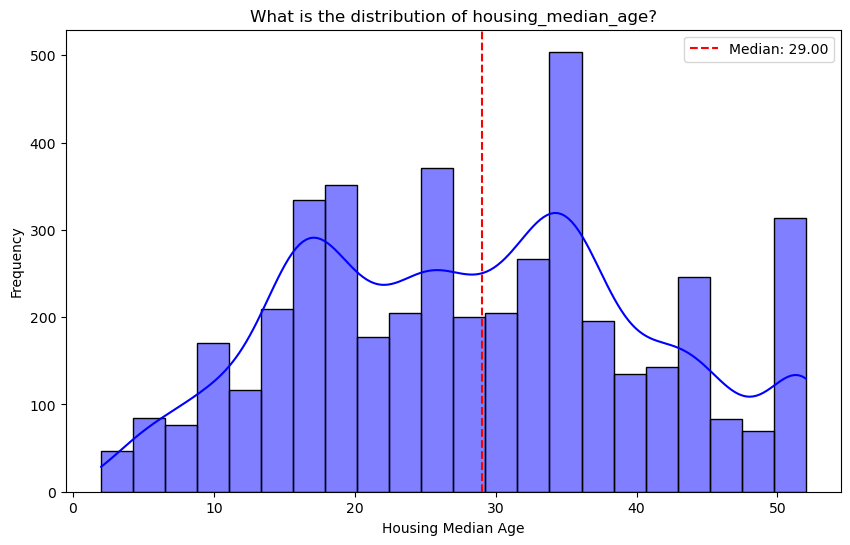

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# solution plan
# i.  ..
def plot(data: pd.DataFrame):

     # only modify this section
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='housing_median_age', kde=True, color='blue', alpha=0.5)
    plt.axvline(x=data['housing_median_age'].median(), color='red', linestyle='--', label=f'Median: {data["housing_median_age"].median():,.2f}')
    plt.legend()
    plt.title('What is the distribution of housing_median_age?', wrap=True)
    plt.xlabel('Housing Median Age')
    plt.ylabel('Frequency')
    return plt;

chart = plot(data)

In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
from lida import Manager, llm

lida = Manager(text_gen = llm("openai")) # palm, cohere ..

In [6]:
summary = lida.summarize("./data/housing.csv")

summary

{'name': 'housing.csv',
 'file_name': 'housing.csv',
 'dataset_description': '',
 'fields': [{'column': 'longitude',
   'properties': {'dtype': 'number',
    'std': 2.0231618362315236,
    'min': -124.3,
    'max': -114.55,
    'samples': [-116.99, -118.1, -115.62],
    'num_unique_values': 669,
    'semantic_type': '',
    'description': ''}},
  {'column': 'latitude',
   'properties': {'dtype': 'number',
    'std': 2.141434460355563,
    'min': 32.55,
    'max': 41.92,
    'samples': [39.38, 39.03, 33.8],
    'num_unique_values': 660,
    'semantic_type': '',
    'description': ''}},
  {'column': 'housing_median_age',
   'properties': {'dtype': 'number',
    'std': 12.467916378686214,
    'min': 2.0,
    'max': 52.0,
    'samples': [48.0, 41.0, 3.0],
    'num_unique_values': 51,
    'semantic_type': '',
    'description': ''}},
  {'column': 'total_rooms',
   'properties': {'dtype': 'number',
    'std': 2227.970479254633,
    'min': 8.0,
    'max': 37937.0,
    'samples': [1240.0, 6603

In [7]:
pd.DataFrame(summary["fields"])

,column,properties
0,longitude,"{'dtype': 'number', 'std': 2.0231618362315236,..."
1,latitude,"{'dtype': 'number', 'std': 2.141434460355563, ..."
2,housing_median_age,"{'dtype': 'number', 'std': 12.467916378686214,..."
3,total_rooms,"{'dtype': 'number', 'std': 2227.970479254633, ..."
4,total_bedrooms,"{'dtype': 'number', 'std': 422.2673695326552, ..."
5,population,"{'dtype': 'number', 'std': 1140.739275918484, ..."
6,households,"{'dtype': 'number', 'std': 384.9317181394569, ..."
7,median_income,"{'dtype': 'number', 'std': 1.9586226746075461,..."
8,median_house_value,"{'dtype': 'number', 'std': 117470.76461350403,..."
9,ocean_proximity,"{'dtype': 'category', 'samples': ['<1H OCEAN',..."


In [8]:
goals = lida.goals(summary, n=3)
pd.DataFrame(goals)

,question,visualization,rationale,index
0,What is the distribution of housing median age...,bar chart of housing median age by ocean proxi...,By visualizing the distribution of housing med...,0
1,How does the median income vary with the housi...,scatter plot of median income against housing ...,A scatter plot of median income against housin...,1
2,What is the relationship between total rooms a...,scatter plot of total rooms against total bedr...,By visualizing the relationship between total ...,2


In [16]:
from lida.utils import plot_raster

charts = lida.visualize(summary=summary, goal=goals[0])
#charts = charts + lida.visualize(summary=summary, goal=goals[1])

charts

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAABLAAAAJYCAYAAABy5h8aAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAADJVUlEQVR4nOzdeXgT1foH8O/MZGlLS2mhtLRCy1KWImURWWW7yg6iuKAICrgAioKioKICiiDgBbcfoldBUFBQkSuLCApU2RQFrsqOrFKWCi1QoG0yc35/1IamTUoLCZPMfD/P4yM5PZ28J/POJHk7c44khBAgIiIiIiIiIiIKULLeARAREREREREREZWEBSwiIiIiIiIiIgpoLGAREREREREREVFAYwGLiIiIiIiIiIgCGgtYREREREREREQU0FjAIiIiIiIiIiKigMYCFhERERERERERBTQWsIiIiIiIiIiIKKCxgEVERERERERERAGNBSwiIiIiIiIiIgpoLGAREREREREREVFAYwGLiIiIiIiIiIgCGgtYREREREREREQU0FjAIiIiIiIiIiKigMYCFhERERERERERBTQWsIiIiIiIiIiIKKCxgEVERERERERERAGNBSwiIiIiIiIiIgpoLGAREREREREREVFAYwGLiIiIiIiIiIgCGgtYREREREREREQU0FjAIiIiIiIiIiKigMYCFhERERERERERBTQWsIiIiIiIiIiIKKCxgEVERERERERERAGNBSwiIiIiIiIiIgpoLGAREREREREREVFAYwGLiIiIiIiIiIgCGgtYREREREREREQU0FjAIiIiIiIiIiKigMYCFhERERERERERBTQWsIiIiIiIiIiIKKCxgEVERERERERERAGNBSwiIiIiIiIiIgpoLGAREREREREREVFAYwGLiIiIiIiIiIgCGgtYRERERERER

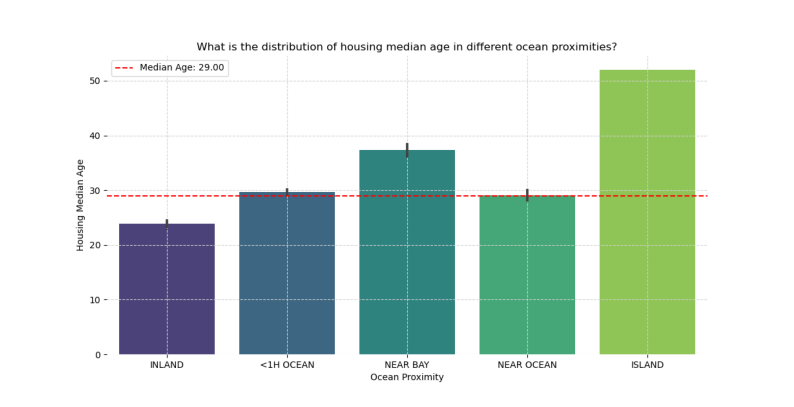

In [17]:
plot_raster(charts[0].raster)
#plot_raster(charts[1].raster)

In [11]:
charts[0].code

'import seaborn as sns\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\ndef plot(data: pd.DataFrame):\n    plt.figure(figsize=(12, 6))\n    sns.barplot(x=\'ocean_proximity\', y=\'housing_median_age\', data=data, palette=\'viridis\')\n    plt.xlabel(\'Ocean Proximity\')\n    plt.ylabel(\'Housing Median Age\')\n    plt.axhline(y=data[\'housing_median_age\'].median(), color=\'r\', linestyle=\'--\', label=f\'Median Age: {data["housing_median_age"].median():.2f}\')\n    plt.legend()\n    plt.title(\'What is the distribution of housing median age in different ocean proximities?\', wrap=True)\n    return plt;\n\nchart = plot(data)'

In [18]:
from lida import Manager, TextGenerationConfig, llm
from dotenv import load_dotenv

load_dotenv()
lida=Manager(text_gen = llm("openai"))
textgen_config = TextGenerationConfig(n=1,temperature=0.5,model="gpt-3.5-turbo-0301", use_cache=True)

summary = lida.summarize("./data/housing.csv", summary_method="default", textgen_config=textgen_config)
goals = lida.goals(summary, n=2, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of median_income across different ocean proximity categories?

**Visualization:** `boxplot of median_income grouped by ocean_proximity`

**Rationale:** This visualization will help us understand the distribution of median_income across different ocean proximity categories. We can see if there are any significant differences in the median_income between the different categories, and if there are any outliers or extreme values that may affect our analysis. This is important for our persona, as they are interested in complex insights about the data.



### Goal 1
---
**Question:** How does the median_house_value vary with respect to housing_median_age?

**Visualization:** `scatterplot of median_house_value vs housing_median_age`

**Rationale:** This visualization will help us understand the relationship between the median_house_value and housing_median_age. We can see if there is any correlation between these two variables, and if there are any outliers or extreme values that may affect our analysis. This is important for our persona, as they are interested in complex insights about the data.


In [19]:
persona = "a architect who wants to create new housing areas in the city"
personal_goals = lida.goals(summary, n=2, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of median_house_value in different ocean_proximity categories?

**Visualization:** `box plot of median_house_value grouped by ocean_proximity`

**Rationale:** This visualization will help the architect understand the distribution of median_house_value in different ocean_proximity categories. It will give insights into the median, quartiles, and outliers of the data, which will be useful in determining the best location to build new housing areas.



### Goal 1
---
**Question:** What is the relationship between median_income and median_house_value?

**Visualization:** `scatter plot of median_income and median_house_value`

**Rationale:** This visualization will help the architect understand the relationship between median_income and median_house_value. It will show if there is a positive or negative correlation between the two variables, which will be useful in determining the affordability of the new housing areas in different locations.


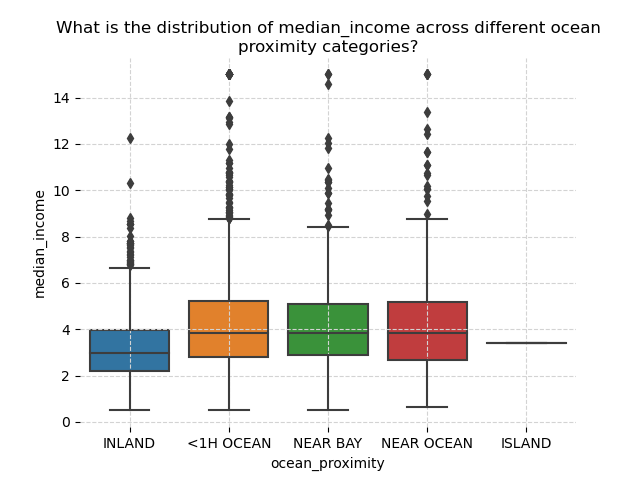

In [20]:
i=0
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal = goals[i], textgen_config=textgen_config, library=library)
charts[0]

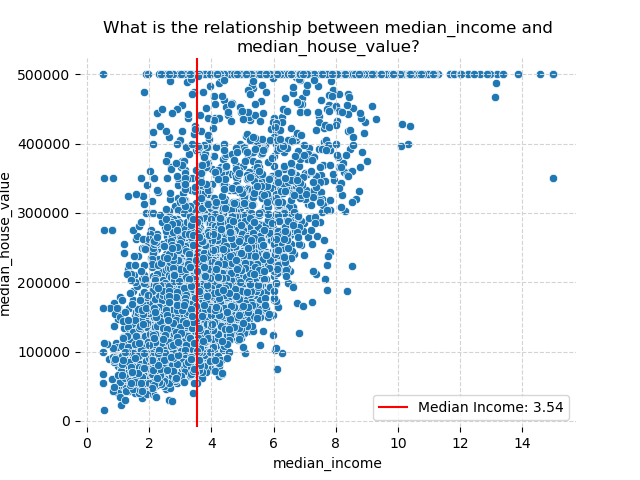

In [21]:
user_query = "What is the relationship between median_income and median_house_value?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary,goal=user_query, textgen_config=textgen_config)
charts[0]

In [23]:
i=0
library = "altair"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal = goals[i], textgen_config=textgen_config, library=library)
charts[0]

import altair as alt
import pandas as pd

def plot(data: pd.DataFrame):
    data['median_income'] = pd.to_numeric(data['median_income'], errors='coerce')
    data = data[pd.notna(data['median_income'])]
    chart = alt.Chart(data).mark_boxplot().encode(
        x=alt.X('ocean_proximity:N', axis=alt.Axis(title='Ocean Proximity')),
        y=alt.Y('median_income:Q', axis=alt.Axis(title='Median Income')),
        color=alt.Color('ocean_proximity:N', legend=alt.Legend(title='Ocean Proximity'))
    ).properties(title='Distribution of Median Income Across Different Ocean Proximity Categories')
    return chart

chart = plot(data)

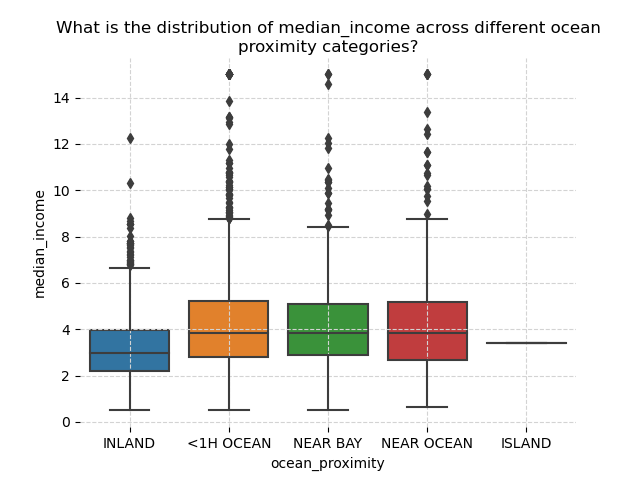

In [24]:
i=0
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal = goals[i], textgen_config=textgen_config, library=library)
charts[0]

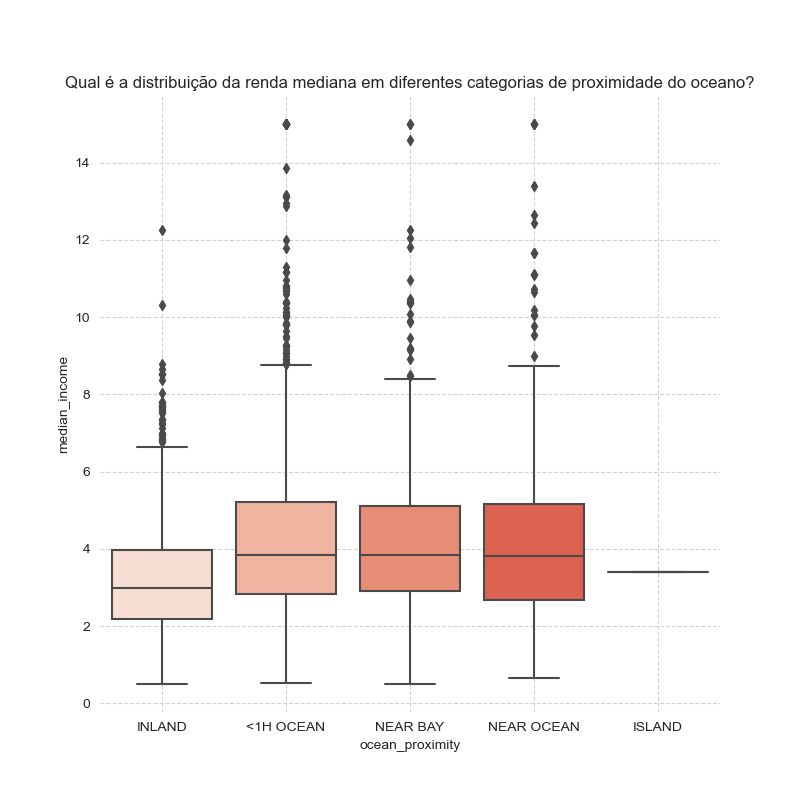

In [25]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the chart height and width equal", "change the color of the chart to red", "translate the chart to portuguese"]
edited_charts = lida.edit(code=code, summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

In [26]:
evaluation = lida.evaluate(code=code, goal = goals[i], textgen_config=textgen_config, library=library)[0]

for eval in evaluation:
    print(eval["dimension"], "Score", eval["score"], "/ 10")
    print("\t", eval["rationale"][:200])
    print("\t******************************")

bugs Score 10 / 10
	 The code is free of bugs, syntax errors, or typos. It will compile without issues.
	******************************
transformation Score 10 / 10
	 The data is appropriately filtered and grouped by ocean proximity and median income. The data transformation is appropriate for the visualization type.
	******************************
compliance Score 10 / 10
	 The code meets the specified visualization goal of showing the distribution of median_income across different ocean proximity categories.
	******************************
type Score 9 / 10
	 The visualization type is appropriate for the data and intent. A boxplot is a good choice for showing the distribution of a continuous variable across different categories. However, a violin plot may 
	******************************
encoding Score 10 / 10
	 The data is encoded appropriately for the visualization type. The x-axis shows the ocean proximity categories, and the y-axis shows the median_income.
	**********************

Recommended 2 charts


c:\Users\cacho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


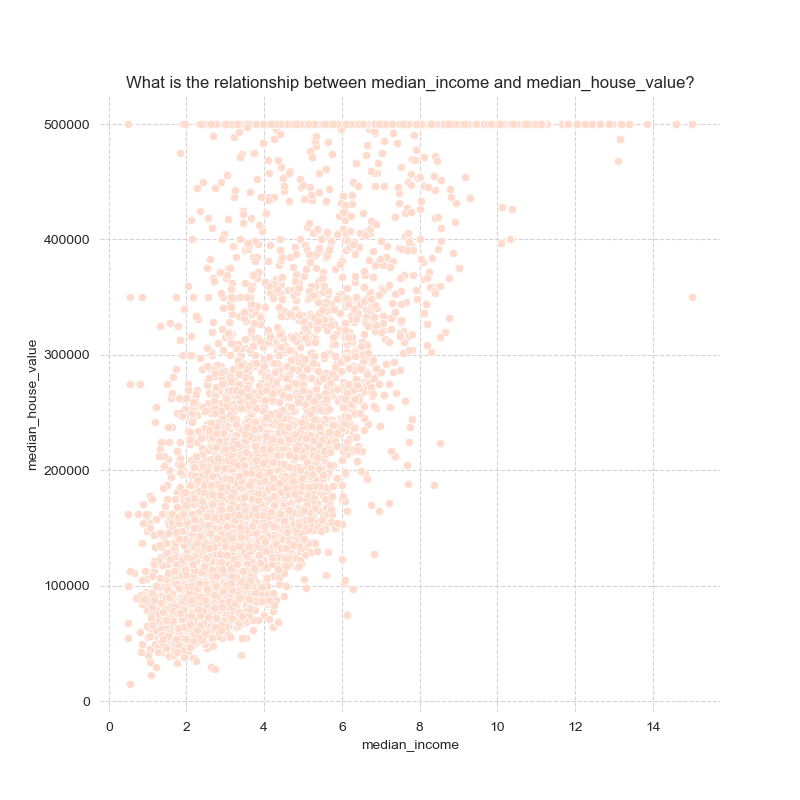

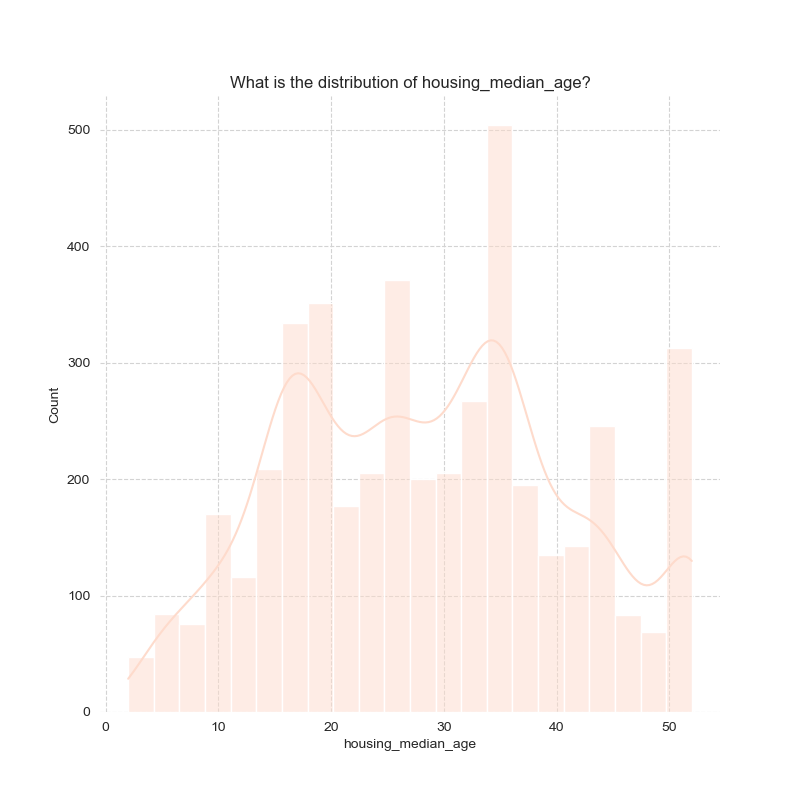

In [27]:
recommended_charts = lida.recommend(code=code, summary=summary, n=2, textgen_config=textgen_config)
print(f"Recommended {len(recommended_charts)} charts")

for chart in recommended_charts:
    display(chart)